In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Q1

In [43]:
data=pd.read_csv(r'/content/Simple_Dataset - Sheet1.csv')
data.head()


,x,y
0,60,30
1,7,40
2,3,52
3,38,18
4,13,38


In [44]:
X=data['x']
Y=data['y']


In [45]:
np.random.seed(200)
k=3
centroids={i+1:[np.random.randint(0,80),np.random.randint(0,80)]
    for i in range(k)} # forming a dictionary of random centroids

fig=plt.figure(figsize=(5,5))
plt.scatter(X,Y,color='k')
colmap={1:'r',2:'b',3:'g'}
for i in centroids.keys():
  plt.scatter(*centroids[i],color= colmap[i] )
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [46]:
centroids.keys()

dict_keys([1, 2, 3])

In [47]:
def assignment(data,centroids):
  for i in centroids.keys():
    # adding three new columns to the dataset
    data['distance from {}'.format(i)]=(np.sqrt((data['x']-centroids[i][0])**2 + (data['y']-centroids[i][1])**2))
    
    # forming a list of the new column names
  centroid_distance_cols=['distance from {}'.format(i) for i in centroids.keys()] 

  # creating a new column closest and adding min value out of the three new columns
  data['closest']=data.loc[:,centroid_distance_cols].idxmin(axis=1)

  data['closest'] = data['closest'].map(lambda x: int(x.lstrip('distance from ')))
  data['color'] = data['closest'].map(lambda x: colmap[x])
  return data

df=assignment(data,centroids)
print(df.head())
fig=plt.figure(figsize=(5,5))
plt.scatter(X,Y,color=df['color'])
for i in centroids.keys():
  plt.scatter(*centroids[i],color=colmap[i],alpha=0.5,edgecolor='k') # to have diff colors for centroids and points
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()


    x   y  distance from 1  distance from 2  distance from 3  closest color
0  60  30        36.769553        14.422205        46.270941        2     b
1   7  40        30.610456        61.032778        60.000000        1     r
2   3  52        42.720019        65.764732        57.271284        1     r
3  38  18        12.165525        38.418745        60.440053        1     r
4  13  38        25.553865        55.145263        56.639209        1     r


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [48]:
import copy #It means that any changes made to a copy of object do reflect in the original object.
old_centroids=copy.deepcopy(centroids)

def update(k):
  for i in centroids.keys():
    centroids[i][0]=np.mean(df[df['closest']==i]['x'])
    centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
  return k
centroids=update(centroids)
fig=plt.figure(figsize=(5,5))
ax=plt.axes()
plt.scatter(X,Y,color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()




Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [49]:
df=assignment(df,centroids)
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'], color=df['color'],alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [50]:
while True:
  closest_centroids = df['closest'].copy(deep = True)
  centroids = update(centroids)
  df = assignment(df, centroids)
  if closest_centroids.equals(df['closest']):
    break
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'], color=df['color'],alpha=0.5, edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Q2

In [3]:
dataset=pd.read_csv('/content/Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset.drop(['CustomerID','Gender'],axis=1,inplace=True)

In [5]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)
kmeans.fit(dataset)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
labels=kmeans.predict(dataset)
centroids=kmeans.cluster_centers_
#colmap={1:'r',2:'b',3:'g',4:'y',5:'p'}
labels

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 4, 1, 2, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

In [7]:
 from mpl_toolkits.mplot3d import Axes3D
  

In [8]:
dataset["cluster"] = labels

In [9]:
dataset

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,0
1,21,15,81,3
2,20,16,6,0
3,23,16,77,3
4,31,17,40,0
...,...,...,...,...
195,35,120,79,1
196,45,126,28,4
197,32,126,74,1
198,32,137,18,4


In [10]:
!pip install ipympl

In [21]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

#colors = ['#DF2020', '#81DF20', '#2095DF','#1f77b4', '#ff7f0e''tab:purple','tab:brown']
colors=['tab:blue',
'tab:orange',
'tab:green',
'tab:red',
'tab:purple',]

dataset['c'] = dataset.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]
                                    ,3:colors[3], 4:colors[4]
                                    })

fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(dataset['Age'],dataset['Annual Income (k$)'],dataset['Spending Score (1-100)'],c=dataset.c, s=15)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

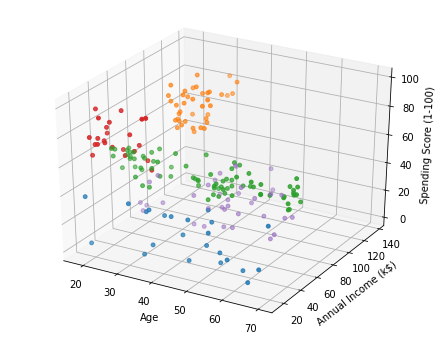

In [22]:
fig